## Visualization of time spent working on software

In [18]:
from datetime import datetime

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm import tqdm

In [6]:
df = pd.read_csv('articles_with_dates.tsv', sep='\t', usecols = ['PMID', 'PubDate','Repo_created_at','Repo_updated_at'])

In [31]:
df["PubDate"] = pd.to_datetime(df["PubDate"])
df["Repo_created_at"] = pd.to_datetime(df["Repo_created_at"])
df["Repo_updated_at"] = pd.to_datetime(df["Repo_updated_at"])

In [32]:
df["Days_before"] = (df["Repo_created_at"] - df["PubDate"]).dt.days
df["Days_after"] = (df["Repo_updated_at"] - df["PubDate"]).dt.days
df["Days_dev"] = (df["Repo_updated_at"] - df["Repo_created_at"]).dt.days
df["Updates"] = df.apply(lambda row: 1 if row["Days_after"] > 30 else 0, axis=1)
df[df["Days_dev"] < 0]

# https://github.com/sermeor/The-Analysis-Kid/commits/main?after=69a4b677398c359efc878ba9ffe64028e3d11c1a+34&branch=main&qualified_name=refs%2Fheads%2Fmain

,PMID,PubDate,Repo_created_at,Repo_updated_at,Days_before,Days_after,Days_dev,Updates
3116,36785731,2021-06-29,2023-02-21,2022-12-01,602,520,-82,1


In [15]:
df = df.dropna(how='any')

5312it [00:03, 1739.21it/s]
3878it [00:01, 2014.88it/s]
1434it [00:00, 1724.98it/s]


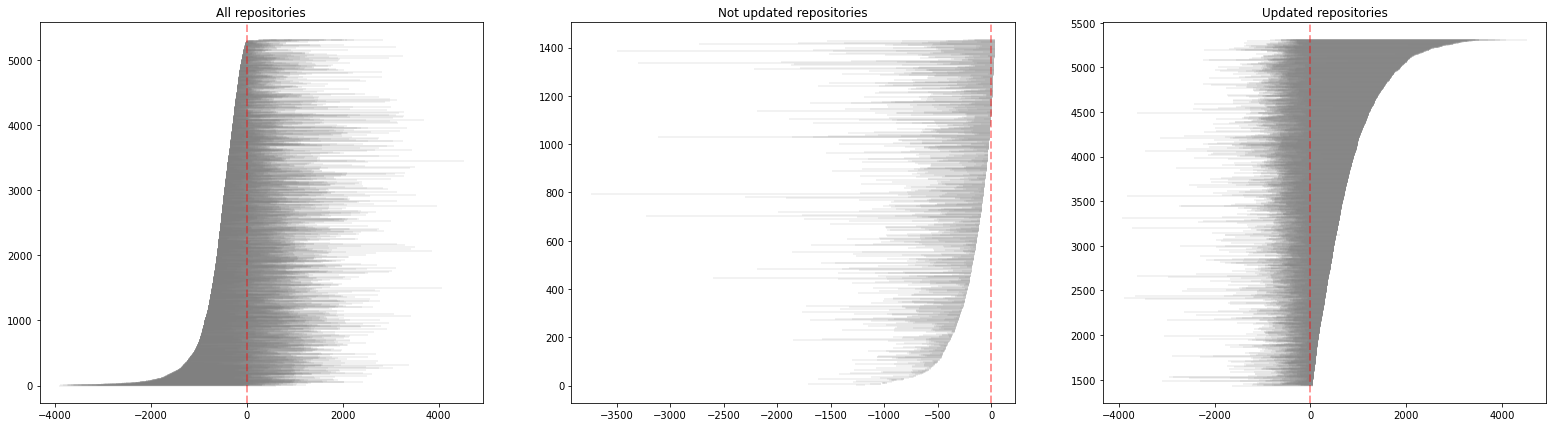

In [29]:
fig, axs = plt.subplots(1, 3, figsize=(27, 7))

df = df.sort_values(by=['Days_before', 'Days_after'], ascending=[True, True])
df = df.reset_index(drop=True)

for i, row in tqdm(df.iterrows()): 
    axs[0].plot([row['Days_before'], row['Days_after']], [i, i], color='grey', linewidth=2, zorder=1, alpha = 0.1)

axs[0].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha = 0.4, zorder=2)  
axs[0].set_title('All repositories')

df = df.sort_values(by=['Days_after', 'Days_before'], ascending=[True, True])
df = df.reset_index(drop=True)

for i, row in tqdm(df[df['Updates'] == 1].iterrows()):
        axs[2].plot([row['Days_before'], row['Days_after']], [i, i], color='grey', linewidth=2, zorder=1, alpha = 0.1)

for i, row in tqdm(df[df['Updates'] == 0].iterrows()):
        axs[1].plot([row['Days_before'], row['Days_after']], [i, i], color='grey', linewidth=2, zorder=1, alpha = 0.1)

axs[2].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha = 0.4, zorder=2)  
axs[1].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha = 0.4, zorder=2)  

axs[2].set_title('Updated repositories')
axs[1].set_title('Not updated repositories')

plt.show()

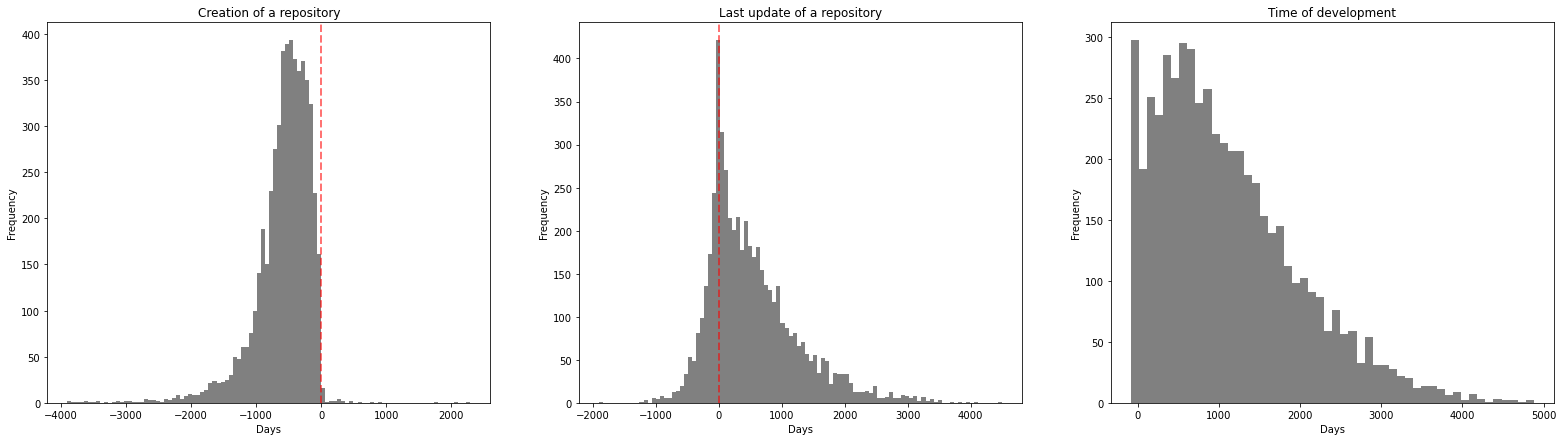

In [26]:
fig, axs = plt.subplots(1, 3, figsize=(27, 7))

axs[0].hist(df['Days_before'], bins=100, color='grey')
axs[1].hist(df['Days_after'], bins=100, color='grey')
axs[2].hist((df['Days_dev']), bins=50, color='grey')

axs[0].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha = 0.55, zorder=2)    
axs[1].axvline(x=0, color='red', linestyle='--', linewidth=2, alpha = 0.55, zorder=2)   

axs[0].set_xlabel('Days')
axs[0].set_ylabel('Frequency')
axs[0].set_title('Creation of a repository')
axs[1].set_xlabel('Days')
axs[1].set_ylabel('Frequency')
axs[1].set_title('Last update of a repository')
axs[2].set_xlabel('Days')
axs[2].set_ylabel('Frequency')
axs[2].set_title('Time of development')

plt.show()

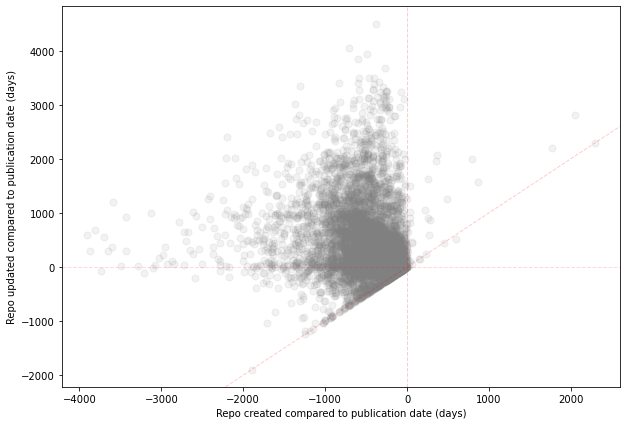

In [72]:
fig, ax = plt.subplots(figsize=(10, 7))

ax.scatter(df['Days_before'], df['Days_after'], alpha = 0.10, s = 50, color = 'grey')

ax.axvline(x=0, color='red', linestyle='--', linewidth=1, alpha = 0.2)  
ax.axhline(y=0, color='red', linestyle='--', linewidth=1, alpha = 0.15)
ax.axline((0,0),(1,1), color='red', linestyle='--', linewidth=1, alpha = 0.20)

ax.set_xlabel("Repo created compared to publication date (days)")
ax.set_ylabel("Repo updated compared to publication date (days)")

plt.show()